In [100]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 1.b
The Python code for 3D-Var to estimate temperatures

In [101]:
def Three_DVar(x_b,B,y,R,H):
    K = B@H.T@np.linalg.inv(R+H@B@H.T)
    x_est = x_b+K@(y-H@x_b)
    return x_est

## (i) The plot of 3D-Var optimal estimates, with the data and background as points.

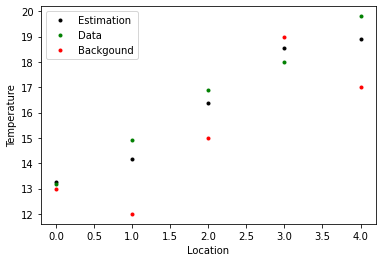

(0.5, 0.125)

In [102]:
def threeD_vs_DB(var_b, cov_b):
    x_b = np.array([[13,12,15,19,17]]).T
    B = var_b*np.eye(5)+cov_b*np.eye(5,k=1)+cov_b*np.eye(5,k=-1)
    y = np.array([[13.2,14.9,16.9,18.0,19.8]]).T
    R = 0.2*np.eye(5)
    H = np.eye(5)
    x_est = Three_DVar(x_b,B,y,R,H)
    plt.plot(x_est,'.',color = 'k')
    plt.plot(y,'.',color = 'g')
    plt.plot(x_b,'.',color = 'r')
    plt.legend(['Estimation','Data','Backgound'])
    plt.xlabel("Location")
    plt.ylabel("Temperature")
    plt.show()
    return (var_b, cov_b)
threeD_vs_DB(0.5, 0.125)

Description: At the first location the estimation,background and observation are all the same,but at the second one the background temperature is low compared to the estimation and observation which are quite have the same range, at the other locations, especially in the fourth location,the estimation,background and observation have the range 18-19.
we can conclude that the estimation and the background have the nearly the tempeature, while the background is different from them.

## (ii) Vary values for var_b and cov_b

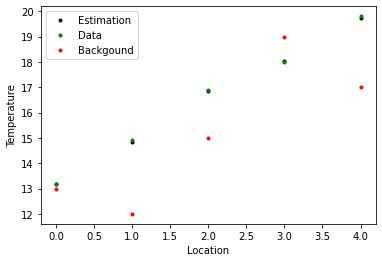

(10, 0.1)

In [103]:
threeD_vs_DB(10, 0.1)

Description: When the variance become larger, the estimation and the data will have the same pattern.

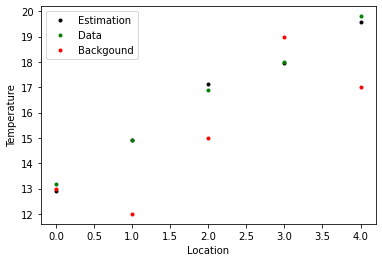

(0.1, 10)

In [104]:
threeD_vs_DB(0.1, 10)

When the covariance become large, the background stay as it, but the data and the estimation is quite similar.

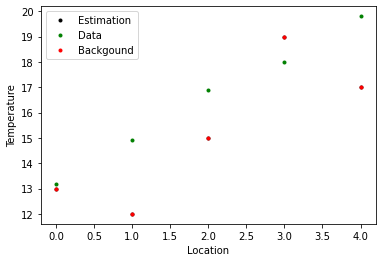

(0, 0)

In [105]:
threeD_vs_DB(0, 0)

If there are no variance and covariance then there is no estimation.

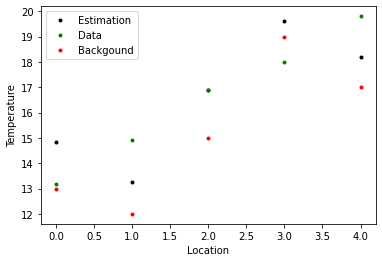

(100, 100)

In [106]:
threeD_vs_DB(100, 100)

I can see now,changing the covariance and the variance does not affect the background, and in this case when both of them have high values the estimation and the data fluctuate.

## (3)

## a.

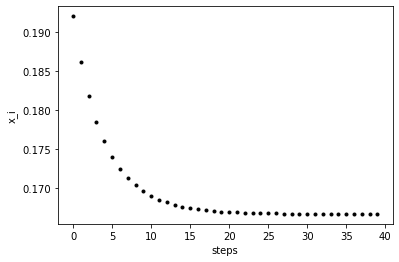

In [107]:
def StatVar(x_0):
    x = np.zeros(41)
    x[0] = x_0
    for i in range(1, 41):
        x[i] = 1.2 * x[i-1] * (1 - x[i-1])
    return x[1:41]
x = StatVar(0.2)
plt.plot( x,'.', color ='k')
plt.xlabel("steps")
plt.ylabel("x_i")
plt.show()

## b.

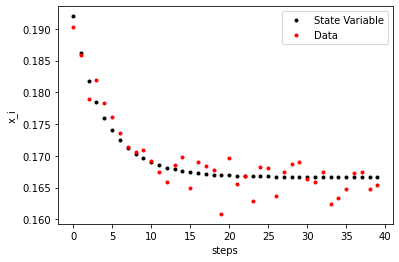

In [108]:
y = x + err
x = StatVar(0.2)
err = np.random.normal(0, 0.002, 40)
plt.plot( x,'.', color ='k')
plt.plot( y,'.', color ='r')
plt.xlabel("steps")
plt.ylabel("x_i")
plt.legend(['State Variable','Data'])
plt.show()

## C.

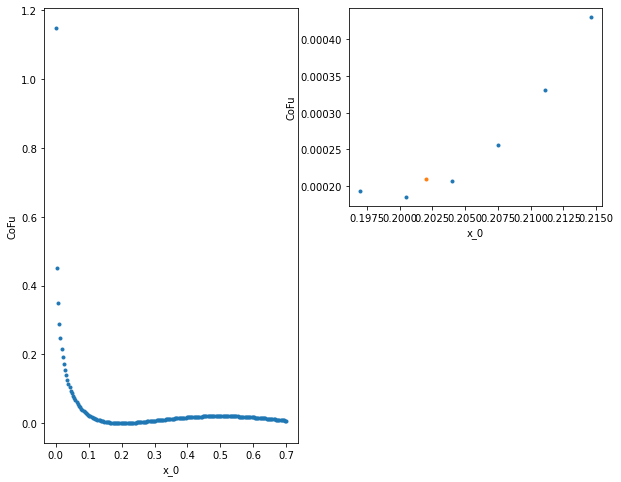

[[1.14908901 0.45171168 0.34857868 0.28934117 0.24814628 0.21687047
  0.19188602 0.17125302 0.15381075 0.1388088  0.1257336  0.11421806
  0.10399052 0.09484423 0.08661813 0.0791843  0.07243938 0.06629865
  0.06069181 0.05555983 0.0508527  0.04652762 0.04254774 0.03888103
  0.03549952 0.03237861 0.02949657 0.0268341  0.02437397 0.02210073
  0.0200005  0.01806074 0.01627008 0.01461818 0.01309563 0.01169382
  0.01040485 0.00922146 0.00813697 0.00714521 0.00624047 0.00541745
  0.00467125 0.00399728 0.00339128 0.00284928 0.00236755 0.00194261
  0.00157118 0.00125021]]


In [109]:
def CoFu(x_0,y,StatVar):
    J = np.zeros(200)
    for i in range(200):
        x = StatVar(x_0[i])
        J[i] = sum((y - x)**2)
    return J.reshape(200, 1)
x_0 = np.linspace(0, 0.7, 200)
J = CoFu(x_0,y,StatVar)
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(x_0, J, '.')
plt.xlabel("x_0")
plt.ylabel("CoFu")
plt.subplot(2, 2, 2)
plt.plot(x_0[(x_0 > 0.195) & (x_0 < 0.215)], J[(x_0 > 0.195) & (x_0 < 0.215)], '.')
plt.plot(0.202, 0.00021, ".")
plt.xlabel("x_0")
plt.ylabel("CoFu")

plt.show()

print(J[:50].T)

## D.

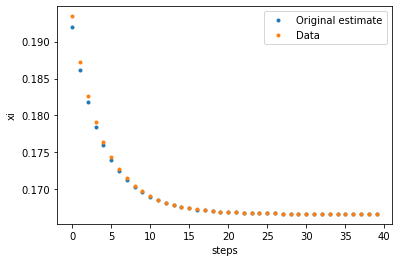

In [110]:
x_est = StatVar(0.202)
plt.plot(x, '.')
plt.plot(x_est, '.')
plt.xlabel("steps")
plt.legend(['Original estimate','Data'])
plt.ylabel("xi")
plt.show()